In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
planet3 = Planet('MARS')
planet3.loadAtmosphereModel('../atmdata/mars-gram-avg.dat', 0 , 1 ,2, 3)
planet3.h_skip = 120.0E3

# Set planet.h_low to 10 km, if vehicle dips below this level
# trajctory is terminated.
planet3.h_trap = 0E3

In [3]:
# Set up a vehicle object
vehicle7=Vehicle('MarsSmallSat1', 37, 20, 0.0, 1.767, 0.0, 0.35, planet3)
vehicle7.setInitialState(120.0,88.15,-0.65,5.3581,8.5458,-5.00,0.0,0.0)
vehicle7.setSolverParams(1E-6)
vehicle7.setDragModulationVehicleParams(20, 7.5)

In [4]:
planet3.h_low = 10e3
# Set target orbit = 2000 km x 2000 km, tolerance = 20 km
# target apo intentionally set to slightly higher value to account for bias in guidance
vehicle7.setTargetOrbitParams(200.0, 2500.0, 20.0)

# Set entry phase parameters
# v_switch_kms = 2.0, lowAlt_km = 20.0,
# numPoints_lowAlt = 101, hdot_threshold = -200.0 m/s.
# These are somewhat arbitary based on experience.
vehicle7.setDragEntryPhaseParams(2.0, 20.0, 101, -200.0)

# Set beta_1 and beta_ratio
vehicle7.setDragModulationVehicleParams(20, 7.5)

# Set vehicle initial state
vehicle7.setInitialState(120.0,88.15,-0.65,5.3581,8.5458,-9.2,0.0,0.0)
# Propogate a single vehicle trajectory
vehicle7.propogateGuidedEntryD2(0.5,1.0,0.1,2400.0)

In [5]:
vehicle8=Vehicle('MSL', 3257, 146, 0.0, np.pi*4.5**2.0*0.25, 0.0, 1.125, planet3)
vehicle8.setInitialState(120,0.0,0.0,5.25,0.0,-12,0.0,0.0)
vehicle8.setSolverParams(1E-6)
vehicle8.propogateEntry (20*60, 0.1, 0.0)

In [6]:
vehicle9=Vehicle('MSL', 3257, 146, 0.0, np.pi*4.5**2.0*0.25, 0.0, 1.125, planet3)
vehicle9.setInitialState(120,0.0,0.0,5.25,0.0,-16,0.0,0.0)
vehicle9.setSolverParams(1E-6)
vehicle9.propogateEntry(20*60, 0.1, 0.0)

In [7]:
heatload_7 = integrate.cumtrapz(vehicle7.q_stag_total_full, vehicle7.t_min_full*60, initial=0)/1e3
heatload_8 = integrate.cumtrapz(vehicle8.q_stag_total, vehicle8.t_minc*60, initial=0)/1e3
heatload_9 = integrate.cumtrapz(vehicle9.q_stag_total, vehicle9.t_minc*60, initial=0)/1e3

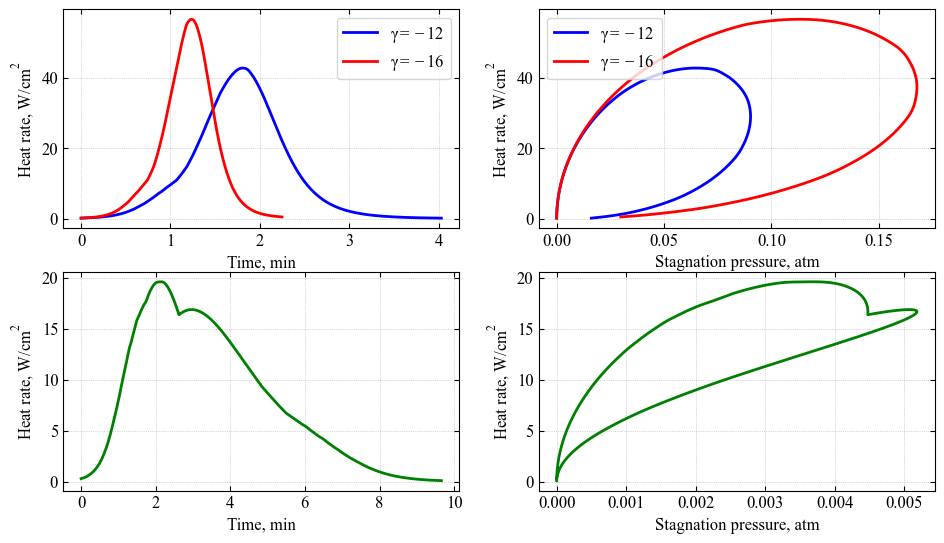

In [8]:
plt.figure(figsize=(11.25, 6.25))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.subplot(2, 2, 1)
plt.plot(vehicle8.t_minc, vehicle8.q_stag_total, 'b-', linewidth=2.0, label=r'$\gamma = -12$')
plt.plot(vehicle9.t_minc, vehicle9.q_stag_total, 'r-', linewidth=2.0, label=r'$\gamma = -16$')
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(2, 2, 2)
plt.plot(vehicle8.stag_pres_atm, vehicle8.q_stag_total, 'b-', linewidth=2.0, label=r'$\gamma = -12$')
plt.plot(vehicle9.stag_pres_atm, vehicle9.q_stag_total, 'r-', linewidth=2.0, label=r'$\gamma = -16$')
plt.xlabel('Stagnation pressure, atm',fontsize=12)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)
plt.legend(loc='upper left', fontsize=12)

plt.subplot(2, 2, 3)
plt.plot(vehicle7.t_min_full, vehicle7.q_stag_total_full, 'g-', linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.subplot(2, 2, 4)
plt.plot(vehicle7.stag_pres_atm_full, vehicle7.q_stag_total_full, 'g-', linewidth=2.0)
plt.xlabel('Stagnation pressure, atm',fontsize=12)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)


plt.savefig('../thermal-protection-systems-plots/mars.png', dpi= 300, bbox_inches='tight')
plt.show()

In [9]:
print(f'{round(heatload_7[-1], 2)} kJ/cm2')
print(f'{round(heatload_8[-1], 2)} kJ/cm2')
print(f'{round(heatload_9[-1], 2)} kJ/cm2')

4.54 kJ/cm2
2.81 kJ/cm2
2.14 kJ/cm2
